In [2]:
import pandas as pd
import datetime
import os

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [5]:
targetdir = "./data/EdgeWeight/one_day_window/"
filename = "weightCDF_one_day_window.csv"

df = pd.read_csv(targetdir + filename)

In [6]:
df

,timestamp,weight,cumulative_probability,percentage_of_total_transaction
0,1511478000000,113,0.007143,23.54
1,1511478000000,20,0.014286,4.17
2,1511478000000,17,0.021429,3.54
3,1511478000000,16,0.028571,3.33
4,1511478000000,12,0.035714,2.50
...,...,...,...,...
3711669,1619560797000,1,1.000000,0.00
3711670,1619560797000,1,1.000000,0.00
3711671,1619560797000,1,1.000000,0.00
3711672,1619560797000,1,1.000000,0.00


In [7]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms').dt.normalize()

In [8]:
len(df["timestamp"].unique())

1252

In [9]:
df.sort_values(["timestamp"])

,timestamp,weight,cumulative_probability,percentage_of_total_transaction
0,2017-11-23,113,0.007143,23.54
102,2017-11-23,1,1.000000,0.21
101,2017-11-23,1,1.000000,0.21
100,2017-11-23,1,1.000000,0.21
99,2017-11-23,1,1.000000,0.21
...,...,...,...,...
3647478,2021-04-27,1,1.000000,0.00
3647477,2021-04-27,1,1.000000,0.00
3647476,2021-04-27,1,1.000000,0.00
3647485,2021-04-27,1,1.000000,0.00


In [10]:
df[df["timestamp"] == "2017-11-23"]

,timestamp,weight,cumulative_probability,percentage_of_total_transaction
0,2017-11-23,113,0.007143,23.54
1,2017-11-23,20,0.014286,4.17
2,2017-11-23,17,0.021429,3.54
3,2017-11-23,16,0.028571,3.33
4,2017-11-23,12,0.035714,2.50
...,...,...,...,...
135,2017-11-23,1,1.000000,0.21
136,2017-11-23,1,1.000000,0.21
137,2017-11-23,1,1.000000,0.21
138,2017-11-23,1,1.000000,0.21


# Mean weight per day

In [11]:
df_mean = df.groupby(["timestamp"]).mean()
df_mean = df_mean.reset_index()
df_mean.drop(["cumulative_probability", "percentage_of_total_transaction"], axis=1, inplace=True)
df_mean

,timestamp,weight
0,2017-11-23,3.428571
1,2017-11-24,1.161644
2,2017-11-25,1.131343
3,2017-11-26,1.117188
4,2017-11-27,1.122449
...,...,...
1247,2021-04-23,1.438284
1248,2021-04-24,1.477648
1249,2021-04-25,1.482732
1250,2021-04-26,1.420064


In [12]:
df_mean.sort_values(["weight"], ascending=False)

,timestamp,weight
731,2019-11-24,12.793930
729,2019-11-22,10.215983
730,2019-11-23,9.804308
739,2019-12-02,8.333129
738,2019-12-01,8.196164
...,...,...
13,2017-12-06,1.029740
50,2018-01-12,1.029670
12,2017-12-05,1.026954
15,2017-12-08,1.025726


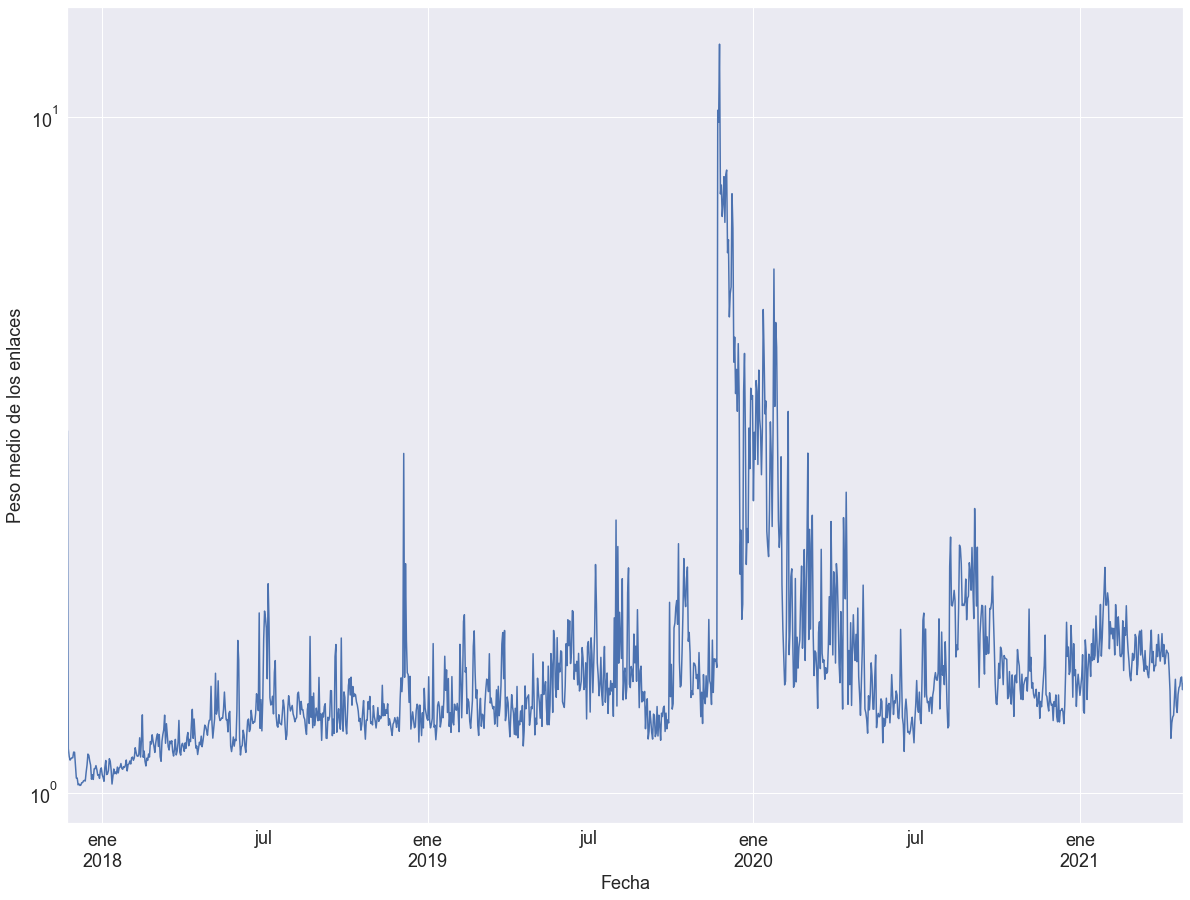

In [13]:
import locale
locale.setlocale(locale.LC_ALL, 'es_ES')

ax = df_mean.plot(kind = 'line', x = 'timestamp', y = 'weight')
ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Peso medio de los enlaces", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,15)
#plt.legend(["Todos los activos"])
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./weightCDF/one_day_window/one_day_window_mean_weightCDF.svg", bbox_inches='tight')

# Median weight per day

In [13]:
df_median = df.groupby(["timestamp"]).median()
df_median = df_median.reset_index()
df_median.drop(["cumulative_probability", "percentage_of_total_transaction"], axis=1, inplace=True)
df_median

,timestamp,weight
0,2017-11-23,1.0
1,2017-11-24,1.0
2,2017-11-25,1.0
3,2017-11-26,1.0
4,2017-11-27,1.0
...,...,...
1247,2021-04-23,1.0
1248,2021-04-24,1.0
1249,2021-04-25,1.0
1250,2021-04-26,1.0


In [14]:
df_median["weight"].unique()

array([1.])

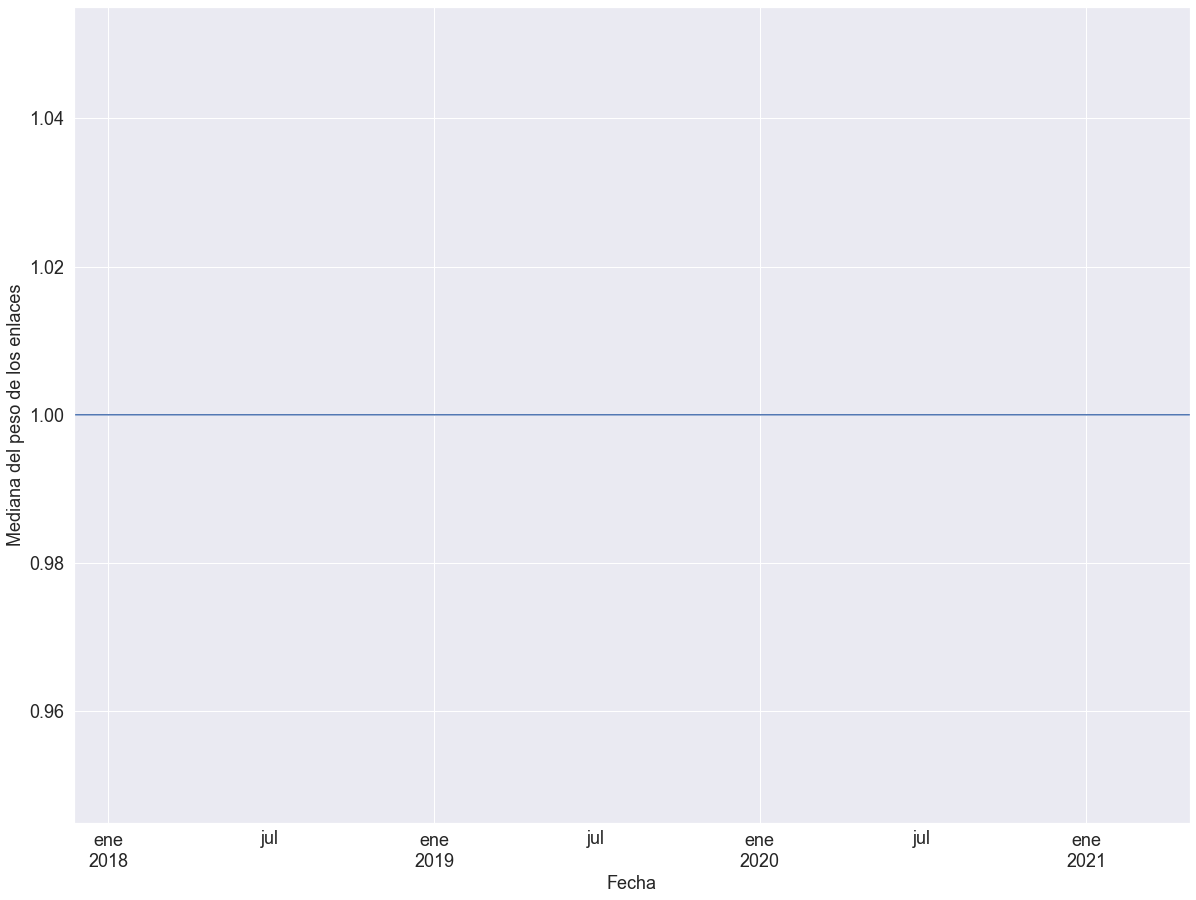

In [16]:
ax = df_median.plot(kind = 'line', x = 'timestamp', y = 'weight')

#ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Mediana del peso de los enlaces", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,15)
#plt.legend(["Todos los activos"])

plt.savefig("./weightCDF/one_day_window/one_day_window_median_weightCDF.svg", bbox_inches='tight')

# Max weight per day

In [15]:
df_max = df.groupby(["timestamp"]).max()
df_max = df_max.reset_index()
df_max.drop(["cumulative_probability", "percentage_of_total_transaction"], axis=1, inplace=True)
df_max

,timestamp,weight
0,2017-11-23,113
1,2017-11-24,7
2,2017-11-25,5
3,2017-11-26,5
4,2017-11-27,3
...,...,...
1247,2021-04-23,361
1248,2021-04-24,648
1249,2021-04-25,1006
1250,2021-04-26,319


In [16]:
df_max.sort_values(["weight"], ascending=False)

,timestamp,weight
731,2019-11-24,2782
738,2019-12-01,2228
730,2019-11-23,2014
739,2019-12-02,2013
734,2019-11-27,1652
...,...,...
3,2017-11-26,5
2,2017-11-25,5
36,2017-12-29,5
50,2018-01-12,4


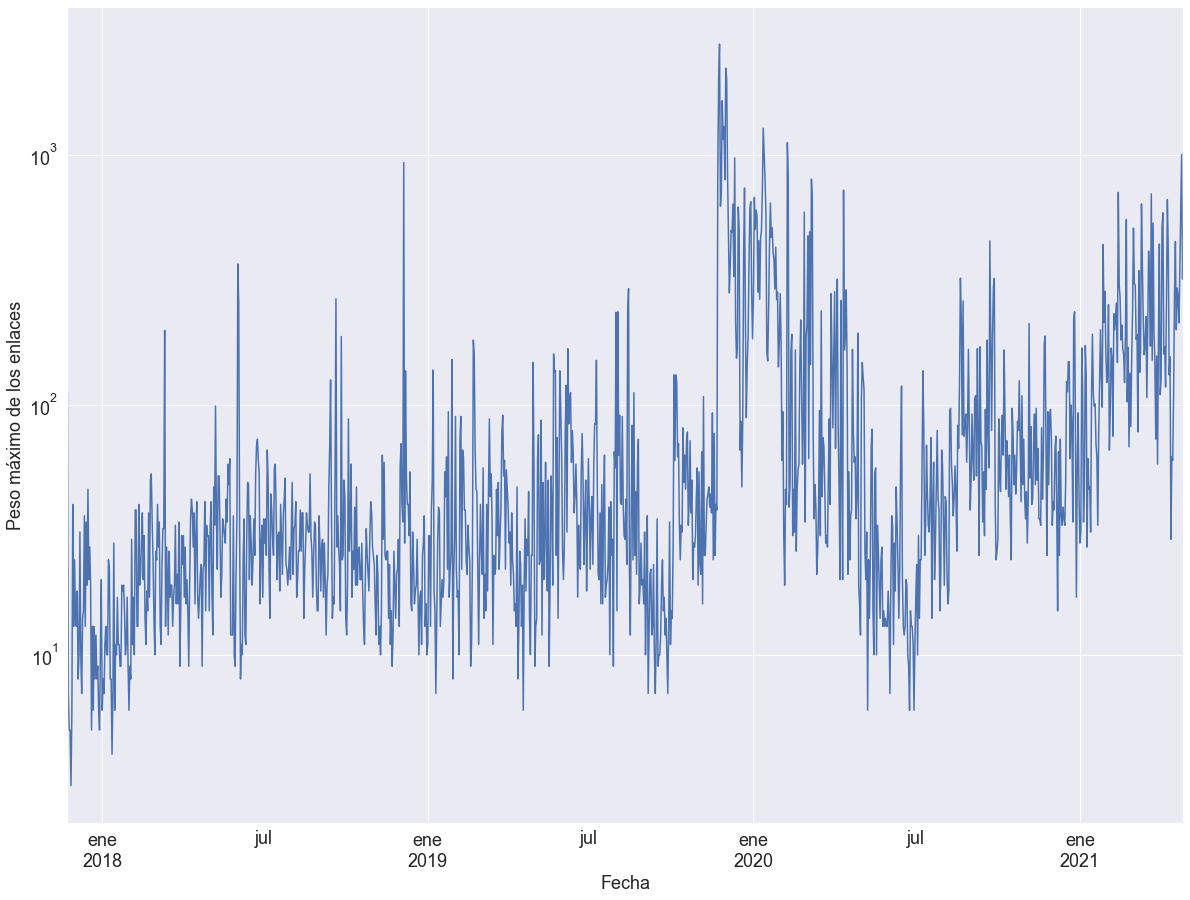

In [19]:
ax = df_max.plot(kind = 'line', x = 'timestamp', y = 'weight')

ax.set_yscale('log')
ax.set_xlabel("Fecha", fontsize=18)
ax.set_ylabel("Peso máximo de los enlaces", fontsize=18)
ax.get_legend().remove()
plt.rcParams["figure.figsize"] = (20,15)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

plt.savefig("./weightCDF/one_day_window/one_day_window_max_weightCDF.svg", bbox_inches='tight')

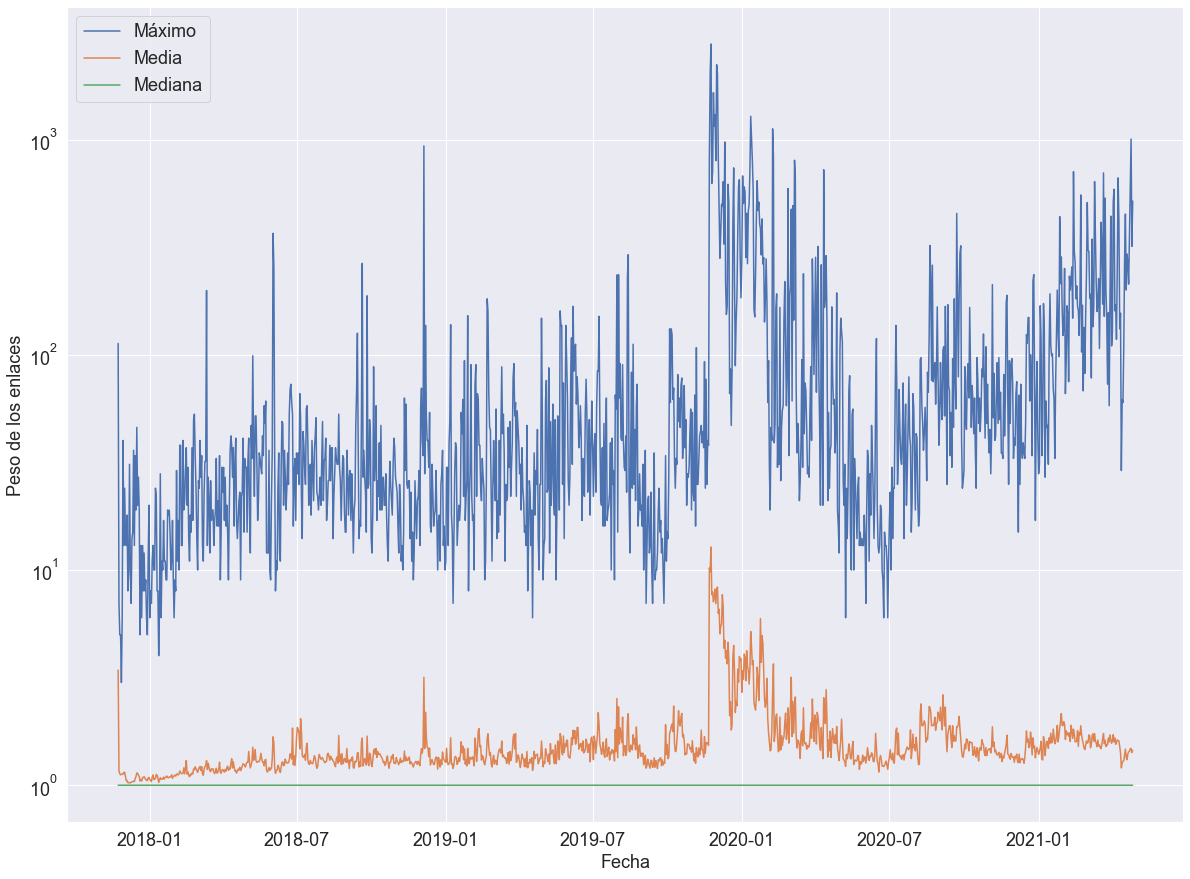

In [23]:
for frame in [df_max, df_mean, df_median]:
    plt.plot(frame['timestamp'], frame['weight'])
    
plt.yscale('log')
plt.ylabel("Peso de los enlaces", fontsize=18)
plt.xlabel("Fecha", fontsize=18)
plt.legend(["Máximo", "Media", "Mediana"], prop={'size': 18}, loc="upper left")
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
plt.figsize=(20, 15)

plt.savefig("./weightCDF/one_day_window/mean_median_max_weight.svg", bbox_inches='tight')

In [23]:
df_mean[(df_mean["timestamp"] > "2019-07-01") & (df_mean["timestamp"] < "2020-01-01")].max()

timestamp    2019-12-31 00:00:00
weight                  12.79393
dtype: object

In [25]:
df_mean[(df_mean["weight"] > 12)]

,timestamp,weight
731,2019-11-24,12.79393
